In [1]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
base_salario = pd.read_csv("data/salario.csv")

In [21]:
base_salario

,idade,salario
0,18,850
1,23,1500
2,28,2000
3,33,2200
4,38,2500
5,43,3500
6,48,3200
7,53,5000
8,58,6000
9,63,3000


# Divisão Dados

In [29]:
X_salario = base_salario.iloc[:, 0].values
X_salario

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [30]:
y_salario = base_salario.iloc[:, 1].values
y_salario

array([ 850, 1500, 2000, 2200, 2500, 3500, 3200, 5000, 6000, 3000],
      dtype=int64)

# Correlação Variáveis

In [31]:
np.corrcoef(X_salario, y_salario)

array([[1.        , 0.81892113],
       [0.81892113, 1.        ]])

# Formatando em matriz

In [32]:
X_salario.shape

(10,)

In [33]:
X_salario = X_salario.reshape(-1,1)

In [34]:
X_salario.shape

(10, 1)

# Treinamento Modelo

In [28]:
from sklearn.linear_model import LinearRegression

In [35]:
reg_salario = LinearRegression()
reg_salario.fit(X_plano, y_plano)

LinearRegression()

In [36]:
reg_salario.intercept_

-453.99999999999955

In [37]:
reg_salario.coef_

array([84.66666667])

# Previsões Modelo

In [38]:
previsoes = reg_salario.predict(X_salario)

In [39]:
previsoes

array([1070.        , 1493.33333333, 1916.66666667, 2340.        ,
       2763.33333333, 3186.66666667, 3610.        , 4033.33333333,
       4456.66666667, 4880.        ])

In [47]:
reg_salario.intercept_ + reg_salario.coef_ * 18

array([1070.])

In [49]:
reg_salario.predict([[43]])

array([3186.66666667])

In [50]:
reg_salario.score(X_salario, y_salario)

0.670631815690499

# Utilizando gráficos

In [46]:
grafico = px.scatter(x = X_salario.ravel(), y = y_salario)
grafico.add_scatter(x = X_salario.ravel(), y = previsoes, name = 'Regressão')
grafico.show()

In [51]:
from yellowbrick.regressor import ResidualsPlot

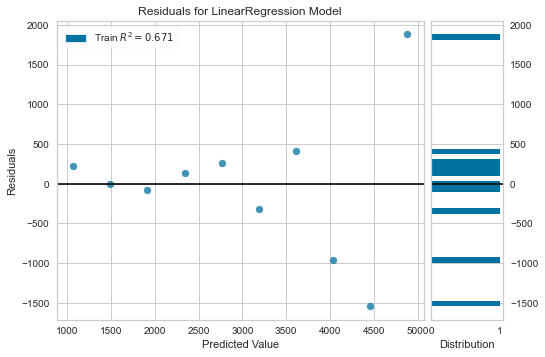

In [53]:
grafico_salario = ResidualsPlot(reg_salario)
grafico_salario.fit(X_salario, y_salario)
grafico_salario.poof();